In [34]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


In [35]:
from pathlib import Path
directory = '/home/joaquindominguez/Documents/QTW/case_studies/QTW_CaseStudy/Case Study 4/data'
files = Path(directory).glob('*')

In [36]:
raw=pd.DataFrame()
n=1
for i in files:
    data = arff.loadarff(i)
    df = pd.DataFrame(data[0])
    df['year'] = n
    raw = pd.concat([raw,df])
    n+=1

In [37]:
raw.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',1


In [38]:
raw['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [39]:
eda = raw.copy()
eda['class'] = eda['class'].astype('str')
eda['class'].replace(regex=True, inplace=True, to_replace=r"'",value=r'')
eda['class'] = eda['class'].replace({"b0":0, "b1":1})
eda['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

Duplicates

In [40]:
eda.duplicated().sum()

401

In [41]:
eda.drop_duplicates(inplace=True)
eda.duplicated().sum()

0

Missing Values

In [42]:
eda['class'].isna().sum()

0

In [43]:
for i in eda.columns:
    mv = eda[i].isna().sum()
    if mv > 5:
        print(i, mv)

Attr1 8
Attr2 8
Attr3 8
Attr4 133
Attr5 89
Attr6 8
Attr7 8
Attr8 93
Attr9 9
Attr10 8
Attr11 44
Attr12 133
Attr13 125
Attr14 8
Attr15 36
Attr16 94
Attr17 93
Attr18 8
Attr19 126
Attr20 125
Attr21 5836
Attr22 8
Attr23 125
Attr24 922
Attr25 8
Attr26 94
Attr27 2750
Attr28 804
Attr29 8
Attr30 125
Attr31 125
Attr32 366
Attr33 133
Attr34 93
Attr35 8
Attr36 8
Attr37 18836
Attr38 8
Attr39 125
Attr40 133
Attr41 754
Attr42 125
Attr43 125
Attr44 125
Attr45 2133
Attr46 134
Attr47 296
Attr48 9
Attr49 125
Attr50 93
Attr51 8
Attr52 300
Attr53 804
Attr54 804
Attr56 125
Attr57 7
Attr58 82
Attr59 7
Attr60 2138
Attr61 101
Attr62 125
Attr63 133
Attr64 804


In [44]:
imp = SimpleImputer(strategy = 'mean', missing_values=np.nan)
imp = imp.fit(eda)
eda_2 = pd.DataFrame(imp.transform(eda.loc[:,:]), columns =eda.columns)
eda_2['class'] = eda_2['class'].astype('int')

In [45]:
eda_2.isna().sum().sum()

0

Distributions

array([[<AxesSubplot: title={'center': 'Attr1'}>,
        <AxesSubplot: title={'center': 'Attr2'}>,
        <AxesSubplot: title={'center': 'Attr3'}>,
        <AxesSubplot: title={'center': 'Attr4'}>,
        <AxesSubplot: title={'center': 'Attr5'}>,
        <AxesSubplot: title={'center': 'Attr6'}>,
        <AxesSubplot: title={'center': 'Attr7'}>,
        <AxesSubplot: title={'center': 'Attr8'}>],
       [<AxesSubplot: title={'center': 'Attr9'}>,
        <AxesSubplot: title={'center': 'Attr10'}>,
        <AxesSubplot: title={'center': 'Attr11'}>,
        <AxesSubplot: title={'center': 'Attr12'}>,
        <AxesSubplot: title={'center': 'Attr13'}>,
        <AxesSubplot: title={'center': 'Attr14'}>,
        <AxesSubplot: title={'center': 'Attr15'}>,
        <AxesSubplot: title={'center': 'Attr16'}>],
       [<AxesSubplot: title={'center': 'Attr17'}>,
        <AxesSubplot: title={'center': 'Attr18'}>,
        <AxesSubplot: title={'center': 'Attr19'}>,
        <AxesSubplot: title={'center':

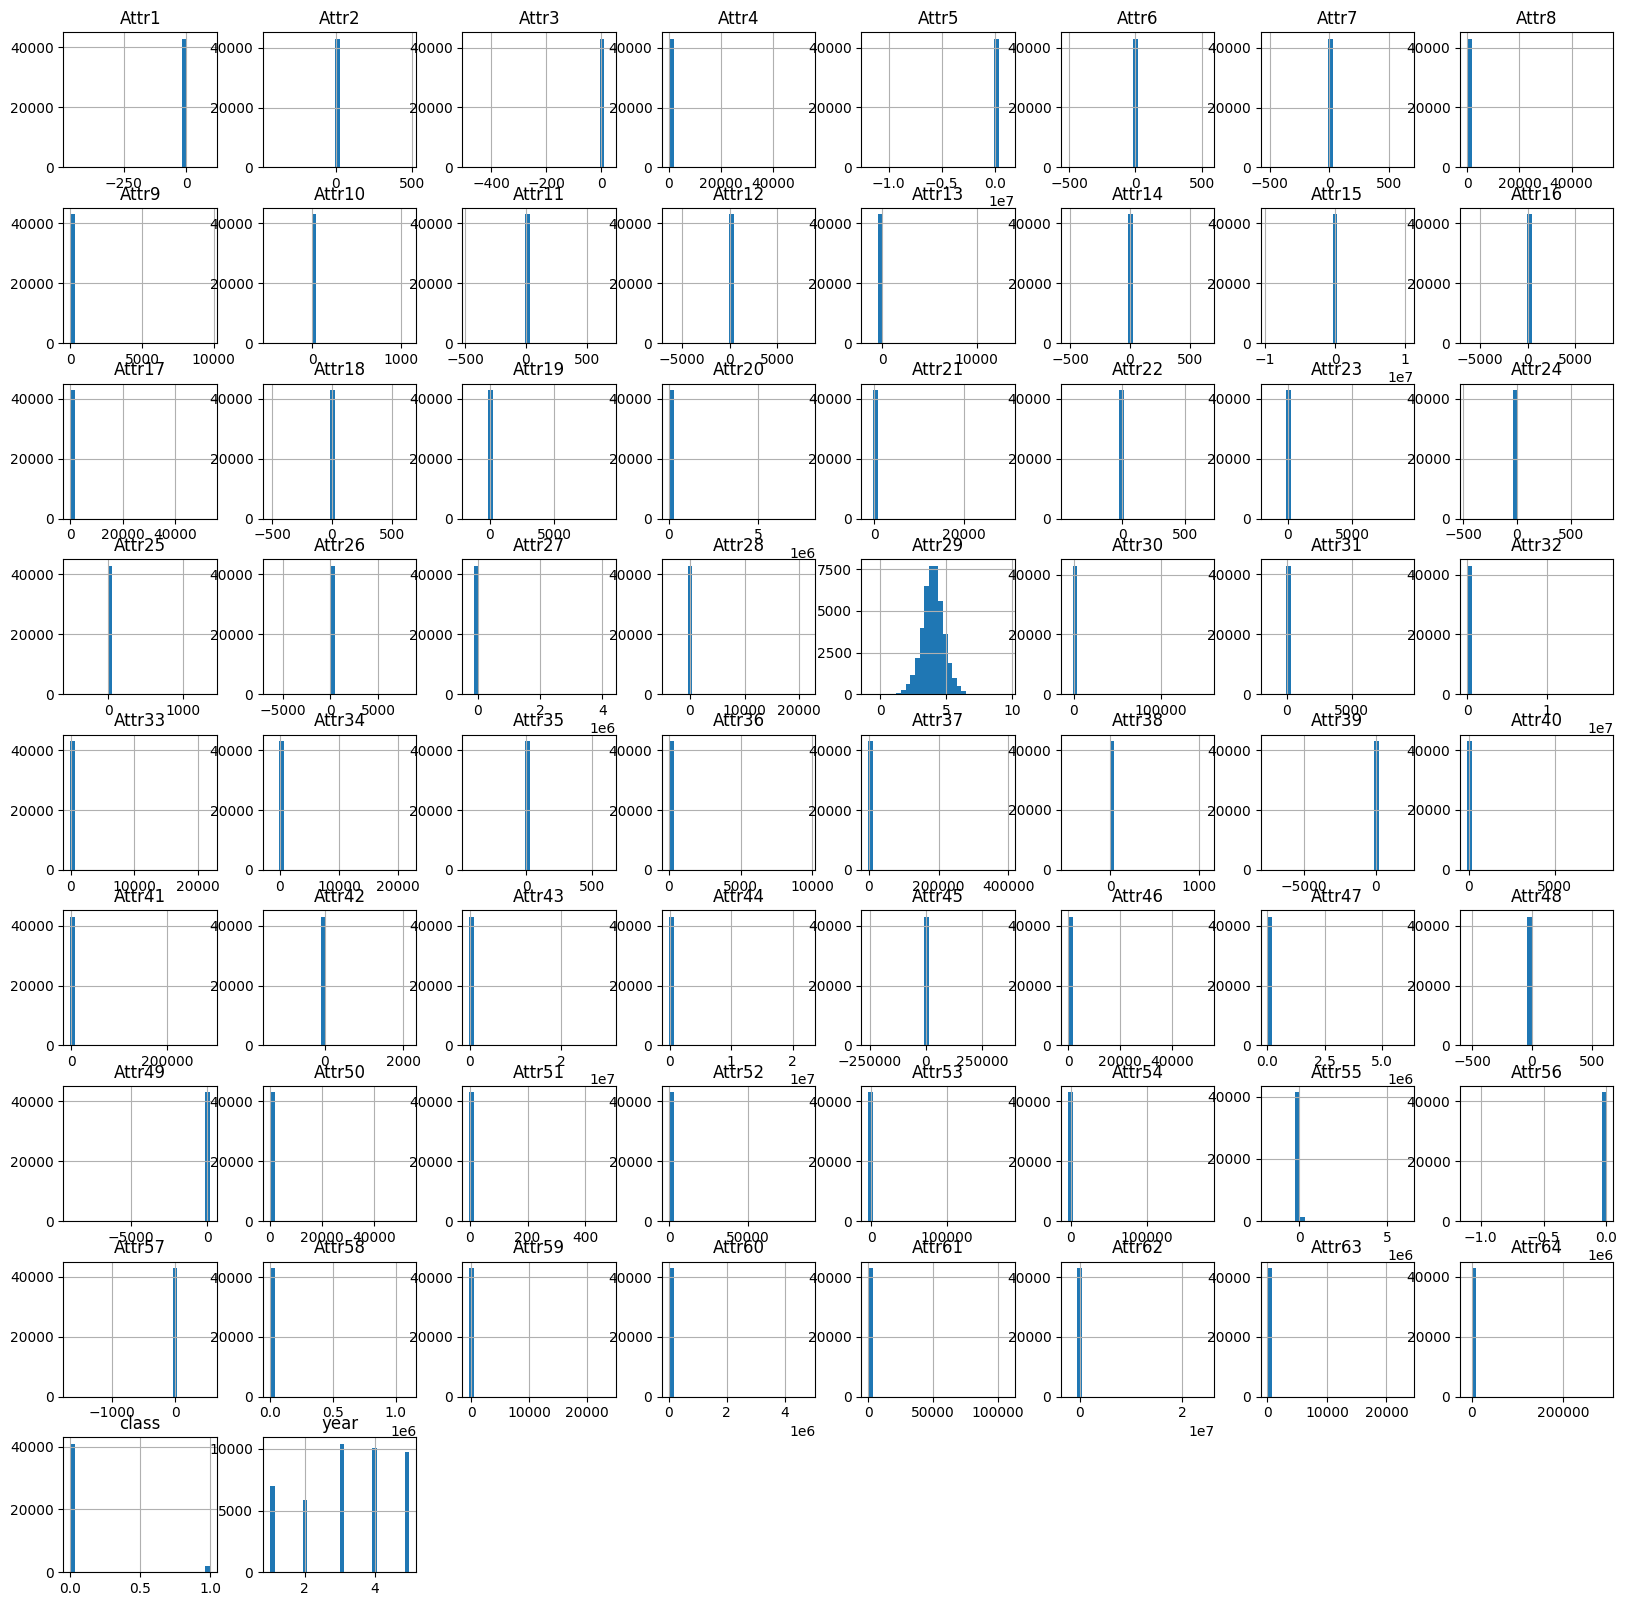

In [49]:
eda_2.hist(bins=30, figsize=(20, 20))

In [50]:
eda_2.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
count,43004.000000,43004.000000,43004.000000,43004.000000,4.300400e+04,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,...,43004.000000,4.300400e+04,43004.000000,4.300400e+04,43004.000000,4.300400e+04,43004.000000,43004.000000,43004.000000,43004.000000
mean,0.040780,0.591872,0.113666,6.344235,-3.861957e+02,-0.057602,0.097948,12.030065,2.574874,0.604874,...,-0.010005,3.029692e+01,1.337995,4.521705e+02,17.114198,1.509433e+03,9.367905,72.651619,0.048437,3.227025
std,2.740643,5.869296,5.464154,296.349513,6.146198e+04,7.234103,5.665732,487.183722,60.396199,13.970689,...,13.734197,5.354078e+03,122.660845,3.168020e+04,554.964928,1.397060e+05,124.558655,2355.605626,0.214691,1.366807
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,1.000000
25%,0.003395,0.269917,0.021582,1.050700,-4.952500e+01,0.000000,0.005758,0.429638,1.018900,0.294580,...,0.014694,8.758000e-01,0.000000,5.732300e+00,4.520750,4.216375e+01,3.103100,2.217075,0.000000,2.000000
50%,0.049637,0.472440,0.196770,1.573900,-1.093650e+00,0.000000,0.059642,1.070950,1.198800,0.505345,...,0.120020,9.512600e-01,0.006164,1.041100e+01,6.659800,7.149150e+01,5.107200,4.413950,0.000000,3.000000
75%,0.129713,0.689040,0.403587,2.803000,5.056100e+01,0.087655,0.151062,2.621425,2.070600,0.708102,...,0.285425,9.928400e-01,0.236650,2.400925e+01,10.471000,1.176500e+02,8.659000,10.533250,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


/home/joaquindominguez/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

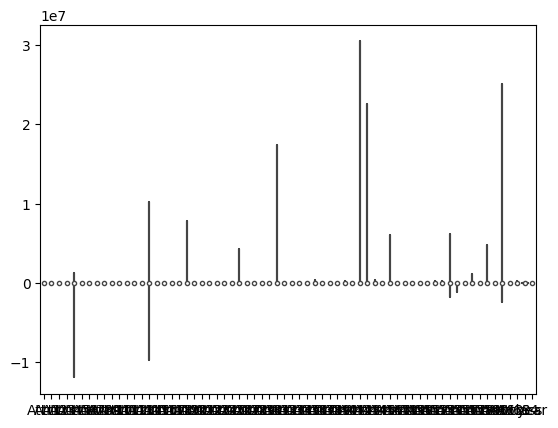

In [51]:
sns.violinplot(data=eda_2)

Train/Test Split

In [52]:

y = eda_2['class']
X = eda_2.drop(columns=['class'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [55]:
y_train.value_counts()

0    32759
1     1644
Name: class, dtype: int64

To richard : Set scale_pos_weight to ~ 19.926 to adjust for imbalanced dataset
- also, maybe grid search for it, in case there's a better parameter, but it should be right around there, given the ratio of value_counts

In [56]:
# Benchmark
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 10, random_state =9)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.9617486338797814